In [112]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [114]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
880,spam,Reminder: You have not downloaded the content ...,NaN,NaN,NaN
2660,ham,Want to finally have lunch today?,NaN,NaN,NaN
58,ham,Tell where you reached,NaN,NaN,NaN
4867,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
1853,ham,I just made some payments so dont have that mu...,NaN,NaN,NaN


In [115]:
df.shape


(5572, 5)

In [116]:
#1. Data cleaning
#2. EDA
#3. Text preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website

## 1. Data cleaning

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [118]:
#dropping last three columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [119]:
df.sample(5)

,v1,v2
1073,ham,Lul im gettin some juicy gossip at the hospita...
130,ham,I'm home.
4339,ham,I want to sent &lt;#&gt; mesages today. Thats...
1307,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
3085,ham,I wish that I was with you. Holding you tightl...


In [120]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5297,ham,My darling sister. How are you doing. When's s...
3776,spam,"Mila, age23, blonde, new in UK. I look sex wit..."
4964,ham,"A few people are at the game, I'm at the mall ..."
1392,ham,"Thk shld b can... Ya, i wana go 4 lessons... H..."
4369,spam,Do you want a new Video handset? 750 any time ...


In [121]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [122]:
df['target'] = encoder.fit_transform(df['target'])

In [123]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
#missing values checking
df.isnull().sum()

target    0
text      0
dtype: int64

In [125]:
#check for duplicate values
df.duplicated().sum()

403

In [126]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [127]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5169, dtype: bool>

In [128]:
df.shape

(5169, 2)

## 2. EDA

In [129]:
#exploratory data analysis(gives an understanding of data)

In [130]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

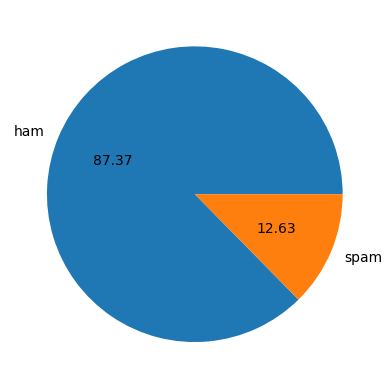

In [132]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct="%0.2f")
plt.show()

In [133]:
#data is imbalanced(more ham, less spam)

In [134]:
import nltk

In [135]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/siya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
df['num_characters'] = df['text'].apply(len)

In [137]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [138]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [139]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [140]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [141]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [142]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [143]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [144]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [145]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

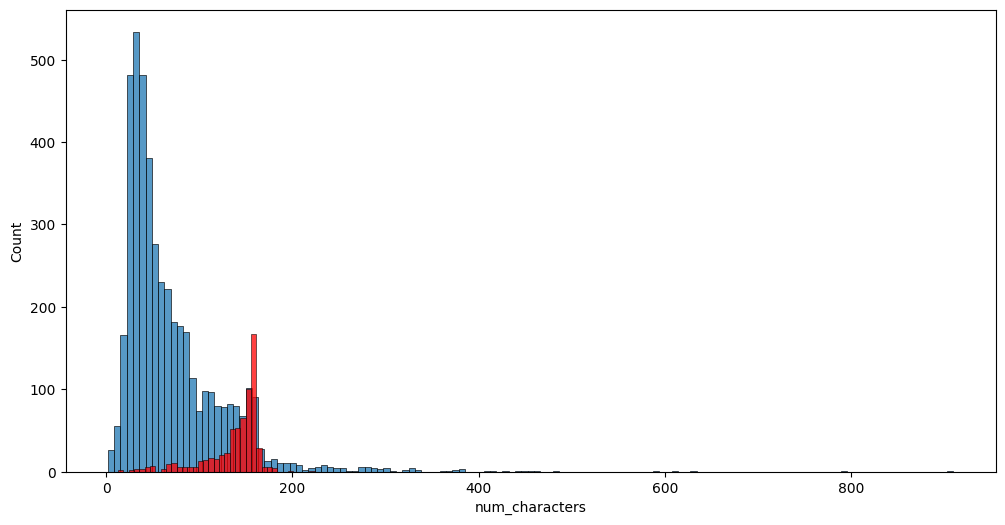

In [146]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

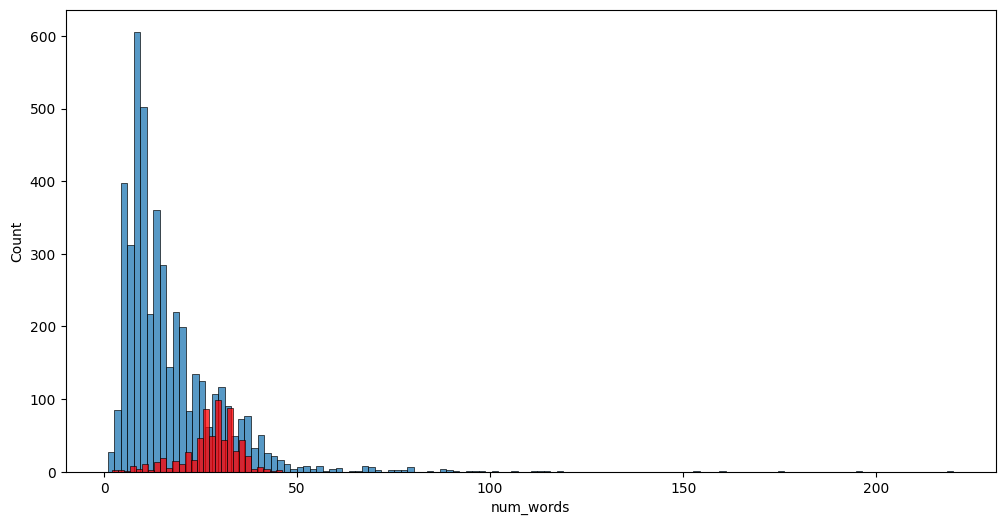

In [147]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

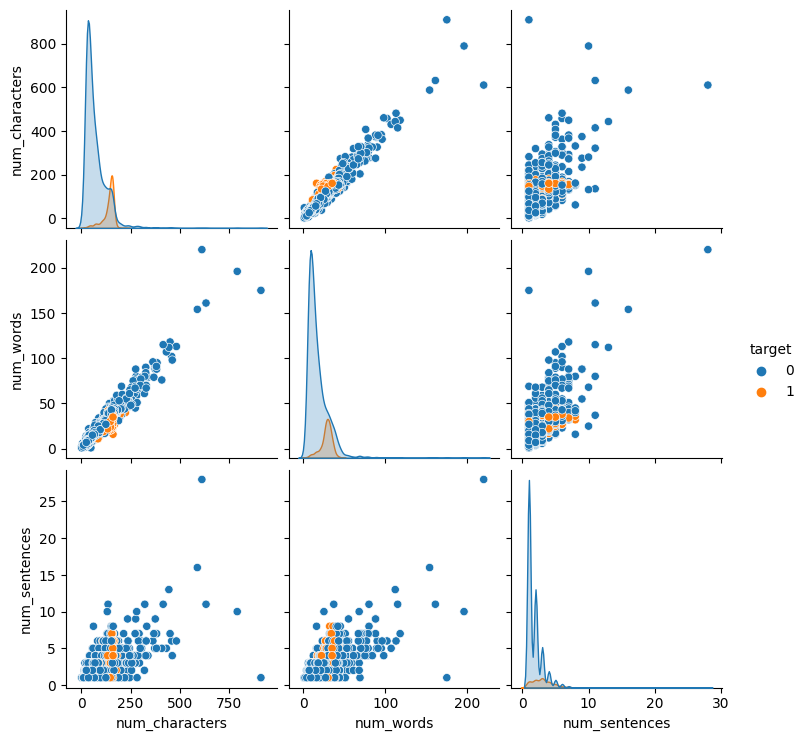

In [148]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
#### 1.lower case
#### 2.tokenization
#### 3.removing special characters
#### 4.removing stop words and punctuation
#### 5.stemming

In [149]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [156]:
from nltk.corpus import stopwords

In [158]:
import string

In [159]:
transform_text('Hi, My name is Siya')

'hi name siya'

In [160]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [161]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [162]:
df['transformed_text']=df['text'].apply(transform_text)

In [154]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [155]:
#insert wordcloud here


In [165]:
df[df['target'] == 1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [183]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [184]:
len(spam_corpus)

9939

In [185]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [188]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [189]:
len(ham_corpus)

35394

In [190]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


## 4.Model Building


In [305]:
#using Naive Bayes(used for textual data)
#vectorizing data 

In [306]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [307]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [308]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [309]:
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))


In [310]:
X.shape

(5169, 3000)

In [311]:
y = df['target'].values

In [312]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [315]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [316]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [317]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [318]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#has perfect precision than the others

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [302]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [303]:
#tfidf ---> mnb

In [319]:
!pip install sklearn

  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2951 sha256=c34707971bcdf49dc4cf2d90e838aae268b88ca3a902f78bdef592896df319fa
  Stored in directory: /Users/siya/Library/Caches/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [321]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [322]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [323]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [324]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [326]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))